# **Data Science for Decision Support**
 

**Executor:** Raniyaharini Rajendran

---
Your individual data for assignment 2:

| Task1, Q3 | Task 3 Q2a | Task 3 Q2b    | Task 3 Q3bc |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| CatBoost       | Random forest       | 5,6        | 6,8        |










# Problem: **Classification** 

# **`Task 1 “Prediction with neural networks” `**

1)	Do all preparation steps as in previous assignments to clean, scale and prepare the dataset
for the analysis. 

In [2]:
pip install rfpimp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10669 sha256=89bf5adcaed9692ebac6baaf7e042c59c1c58f75f5e1a00f21888b3a24096891
  Stored in directory: /root/.cache/pip/wheels/ad/48/d9/21fc62fbeff405425b0d5dd8b0354576cdb62ac97f6b11d1ef
Successfully built rfpimp


In [5]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
#Write your code here 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler     
from sklearn import metrics,svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import time
import random
from scipy.stats import uniform, randint
import ipywidgets as widgets
from IPython.display import clear_output

In [74]:
#add more cell if needed to each code cell
heart_df = pd.read_csv('heart.csv')

In [75]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [76]:
#Write your code here 
heart_df.describe(include = 'all')

Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR ExerciseAngina     Oldpeak ST_Slope  \
count         918  918.000000            918  918.000000      918   
unique          3         NaN              2         NaN        3   
top        Normal         NaN              N         NaN     Flat   
freq          552         NaN            547         NaN      460   
mean          NaN  136.809368            NaN    0.887364      NaN   
std           NaN   25.460334            NaN    1.066570      NaN   
min           NaN   60.000000            NaN   -2.600000      NaN   
25%           NaN  120.000000            NaN    0.000000      NaN   
50%           NaN  138.000000            NaN    0.600000      NaN   
75%           NaN  156.000000            NaN    1.500000      NaN   
max           NaN  202.000000            NaN    6.200000      NaN   

        HeartDisease  
count     918.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.553377  
std         0.497414  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

In [77]:
#Converting categorical into numerical values
le = LabelEncoder()
heart_df['Sex']=le.fit_transform(heart_df['Sex'])
heart_df['RestingECG']=le.fit_transform(heart_df['RestingECG'])
heart_df['ChestPainType']=le.fit_transform(heart_df['ChestPainType'])
heart_df['ExerciseAngina']=le.fit_transform(heart_df['ExerciseAngina'])
heart_df['ST_Slope']=le.fit_transform(heart_df['ST_Slope'])

heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [78]:
#Checking for NAN values
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Result shows there are no null values present in the dataset

In [79]:
list(heart_df.columns)

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [80]:
heart_df.corr()

Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000  0.055750      -0.077150   0.254399    -0.095282   
Sex             0.055750  1.000000      -0.126559   0.005133    -0.200092   
ChestPainType  -0.077150 -0.126559       1.000000  -0.020647     0.067880   
RestingBP       0.254399  0.005133      -0.020647   1.000000     0.100893   
Cholesterol    -0.095282 -0.200092       0.067880   0.100893     1.000000   
FastingBS       0.198039  0.120076      -0.073151   0.070193    -0.260974   
RestingECG     -0.007484  0.071552      -0.072537   0.022656    -0.196544   
MaxHR          -0.382045 -0.189186       0.289123  -0.112135     0.235792   
ExerciseAngina  0.215793  0.190664      -0.354727   0.155101    -0.034166   
Oldpeak         0.258612  0.105734      -0.177377   0.164803     0.050148   
ST_Slope       -0.268264 -0.150693       0.213521  -0.075162     0.111471   
HeartDisease    0.282039  0.305445      -0.386828   0.107589    -0.232741   

                FastingBS  RestingECG     MaxHR  ExerciseAngina   Oldpeak  \
Age              0.198039   -0.007484 -0.382045        0.215793  0.258612   
Sex              0.120076    0.071552 -0.189186        0.190664  0.105734   
ChestPainType   -0.073151   -0.072537  0.289123       -0.354727 -0.177377   
RestingBP        0.070193    0.022656 -0.112135        0.155101  0.164803   
Cholesterol     -0.260974   -0.196544  0.235792       -0.034166  0.050148   
FastingBS        1.000000    0.087050 -0.131438        0.060451  0.052698   
RestingECG       0.087050    1.000000 -0.179276        0.077500 -0.020438   
MaxHR           -0.131438   -0.179276  1.000000       -0.370425 -0.160691   
ExerciseAngina   0.060451    0.077500 -0.370425        1.000000  0.408752   
Oldpeak          0.052698   -0.020438 -0.160691        0.408752  1.000000   
ST_Slope        -0.175774   -0.006778  0.343419       -0.428706 -0.501921   
HeartDisease     0.267291    0.057384 -0.400421        0.494282  0.403951   

                ST_Slope  HeartDisease  
Age            -0.268264      0.282039  
Sex            -0.150693      0.305445  
ChestPainType   0.213521     -0.386828  
RestingBP      -0.075162      0.107589  
Cholesterol     0.111471     -0.232741  
FastingBS      -0.175774      0.267291  
RestingECG     -0.006778      0.057384  
MaxHR           0.343419     -0.400421  
ExerciseAngina -0.428706      0.494282  
Oldpeak        -0.501921      0.403951  
ST_Slope        1.000000     -0.558771  
HeartDisease   -0.558771      1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0caca52590>,
      dtype=object)

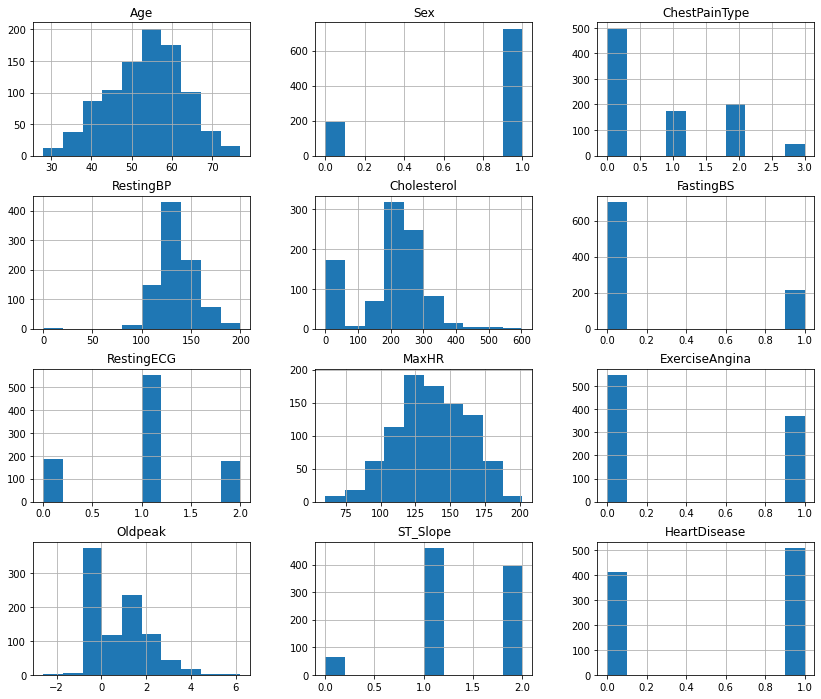

In [10]:
heart_df.hist(figsize = (14,12))

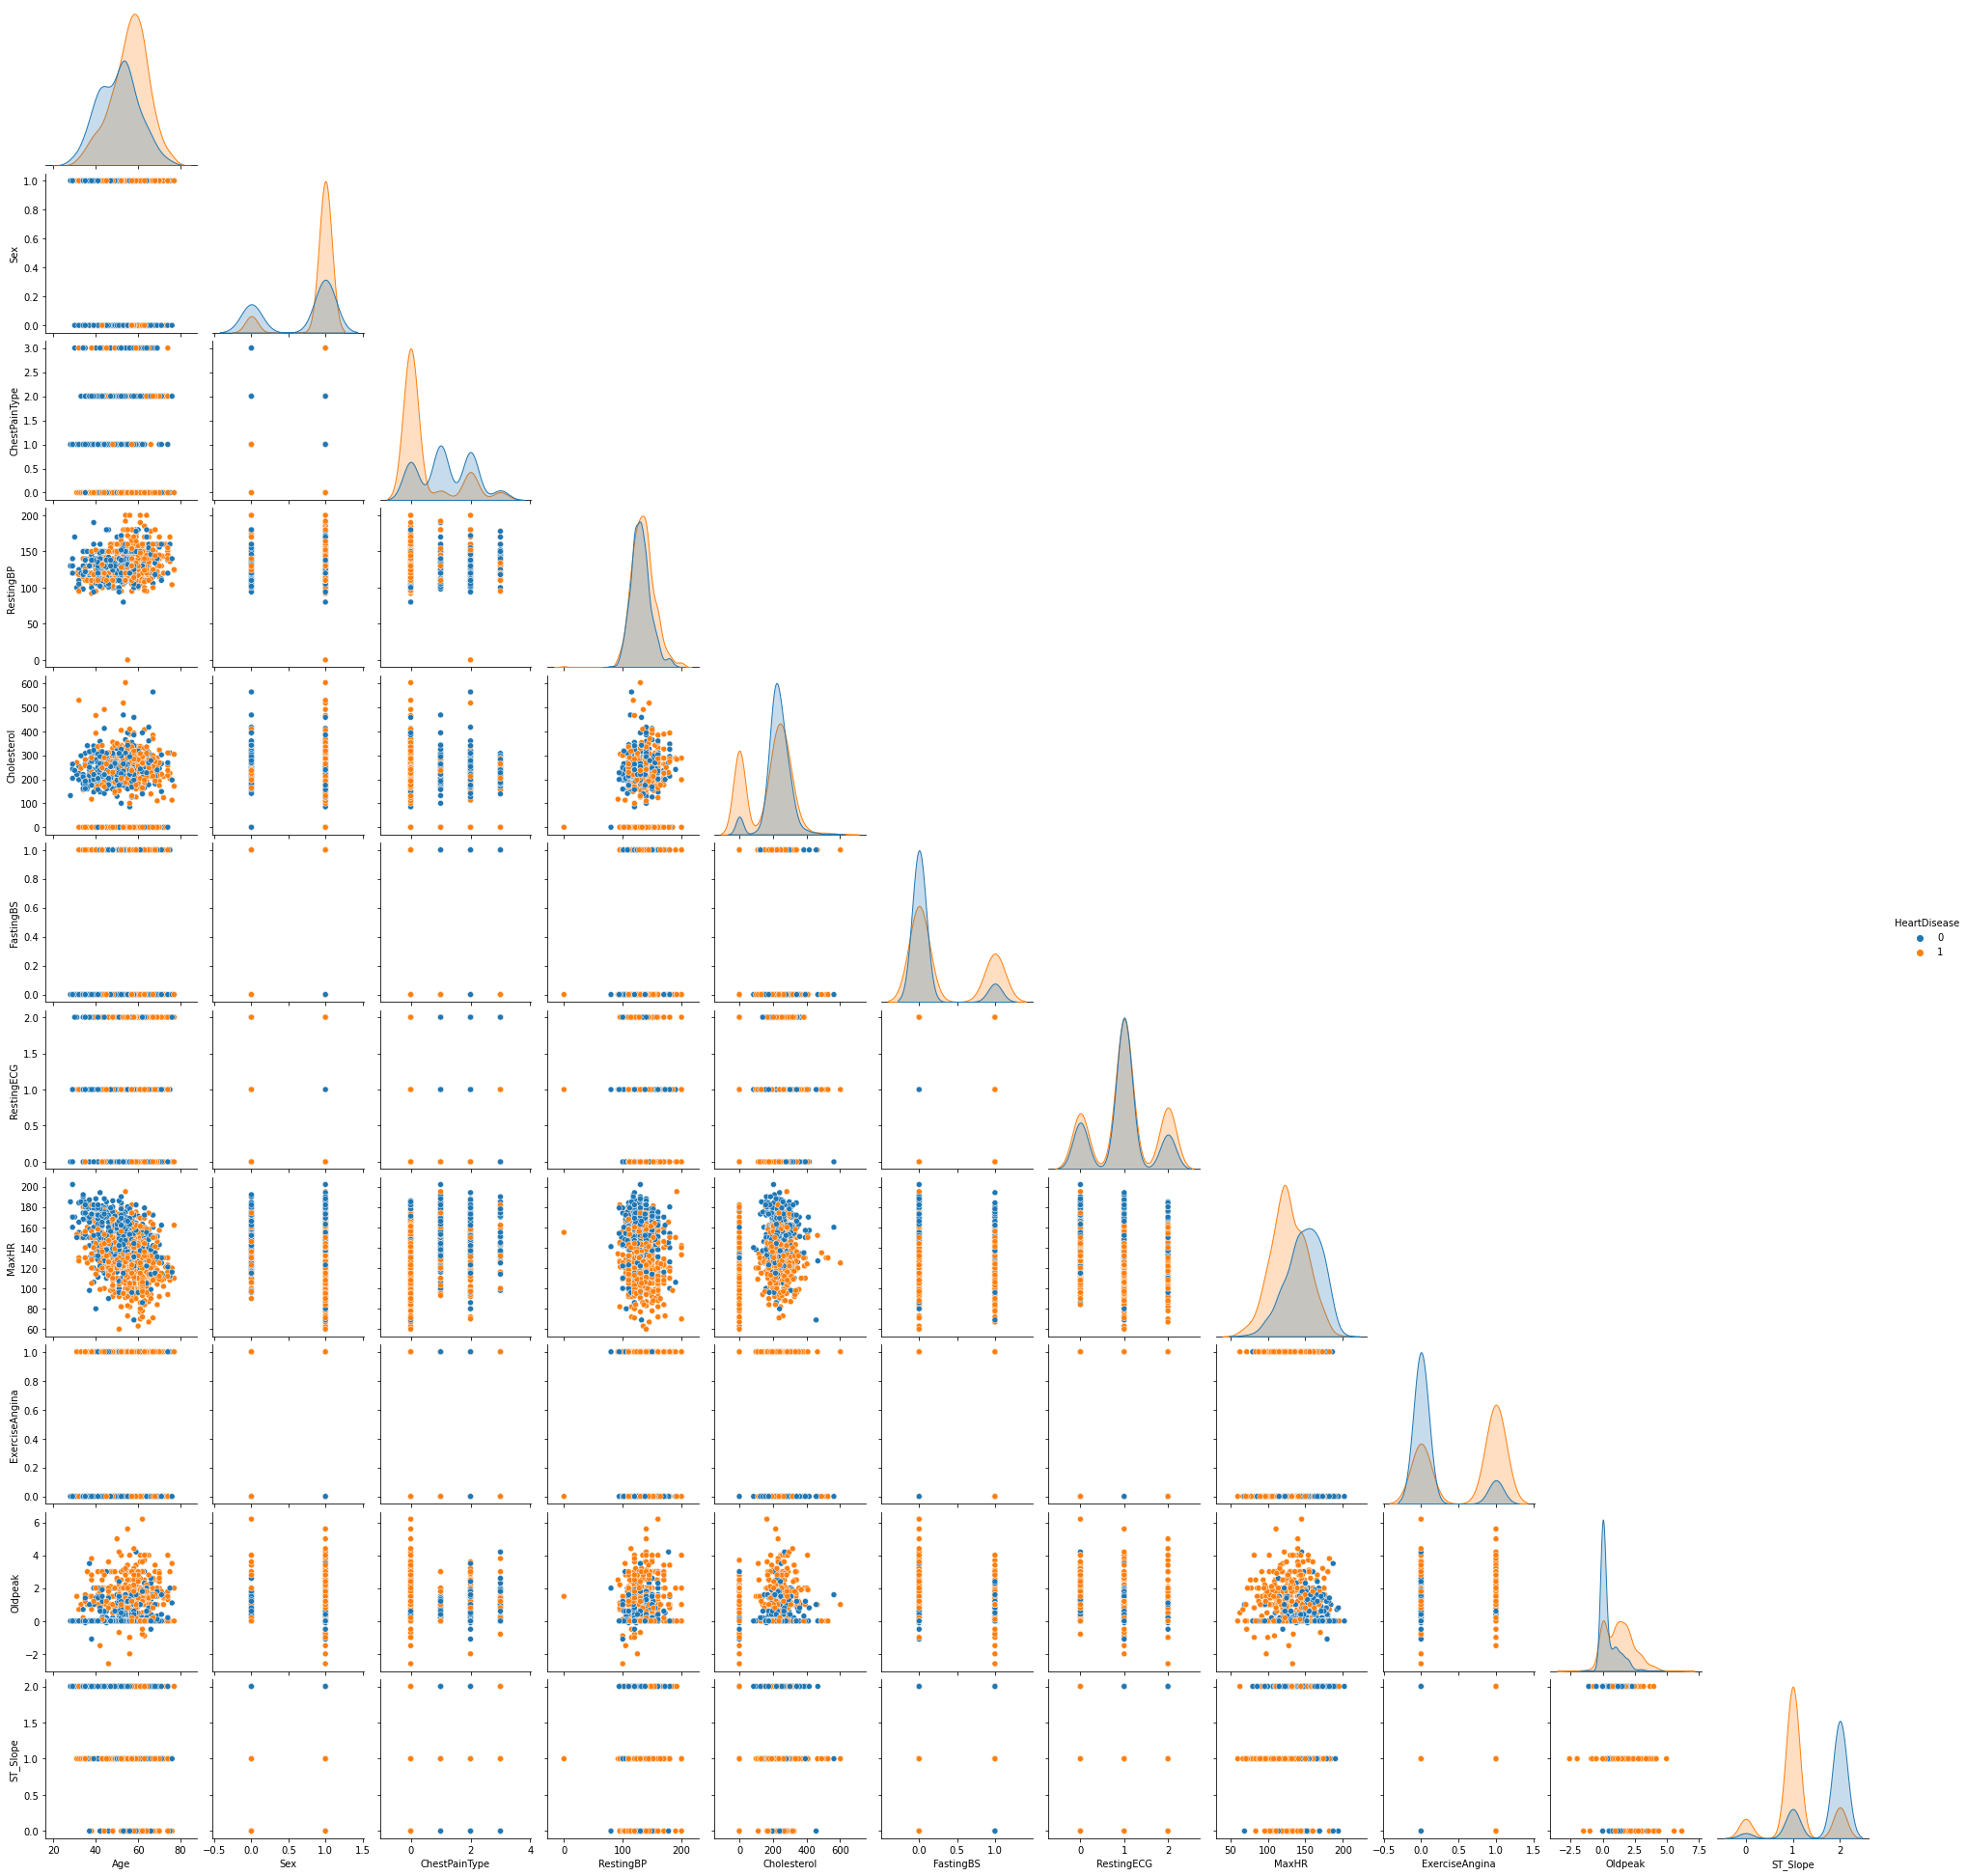

In [11]:
sns.pairplot(heart_df,hue='HeartDisease',corner=True)

The variables are not highly correlated and it is an almost balanced dataset

2) Construct a fully connected neural network using “keras” library. The network should
contain 1-2 hidden layers. Experiment with different number of neurons for each layer, try
several dropout layers between hidden layers. Try to achieve the performance near or better
than the best one of your previous methods. Present the performance results (predictions,
R2, MSE, MAE) for the testset with 3 best architectures as a table. Use repeated holdout crossvalidation, generating 5 random training sets and test sets with proportion according to
your individual variant in assignment 2.

In [81]:
#Write your code here 
X = heart_df.drop(["HeartDisease"], axis =1)
y = heart_df["HeartDisease"]

In [82]:
#Splitting training and test set based on individual variant in assignment 2 - 90:10
# repeated holdout cross-validation(random_state =5)
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state=5)

From the results of the assignment 2 it was clear that StandardScalar performed better than MinMax Scalar. Therefore in this assignement we are using StandardScalar

In [83]:
#Standard Scaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [15]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras import callbacks

Here I tried working with KerasClassifier considering two categories:

*   Working with binary variables
*   Working with categorical variables



Here,the neural network was constructed with 1-Input layer, 2-Hidden layer, 2-Droupout layer and 1-Output layer.
The neural network holds 3 neurons - relu, sigmoid and softmax.






I tried using softmax as the output layer as the y_test and y_train features were converted into categorical. Manipulation of categorical variables was performed here. Hence, loss function was declared as categorical_crossentropy

In [16]:
import tensorflow as tf
from yellowbrick.classifier import ROCAUC
def create_model():
	# create model
  model = models.Sequential()
  #Using 3 types of neurons (relu,sigmoid and softmax)
  model.add(Dense(11, activation='relu',input_shape=(X_train.shape[1],)))#Input layer
  model.add(Dropout(0.25))#Dropout layer
  model.add(Dense(5, activation='sigmoid'))#Hidden layer
  model.add(Dropout(0.25))#Dropout layer
  model.add(Dense(3, activation='softmax'))#Output layer 
  # Compile model
  model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

train_labels = to_categorical(y_train,3)
test_labels = to_categorical(y_test,3)

model = KerasClassifier(model=create_model, epochs=20, batch_size=40, verbose=1)
model.fit(X_train,train_labels)

#Accuracy score,precision,recall and F1-score
y_pred=model.predict(X_test)
acc = accuracy_score(y_pred,test_labels)
print('Accuracy Score is:',acc)

#There are some labels in test_labels which doesn't appear in y_pred, hence we explicitly mention labels=np.unique(y_pred)
print(classification_report(test_labels, y_pred,labels=np.unique(y_pred)))

'''#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
visualizer = ROCAUC(model,classes=["win", "loss", "draw"])

visualizer.fit(X_train, train_labels)        # Fit the training data to the visualizer
visualizer.score(X_test, test_labels)        # Evaluate the model on the test data
visualizer.show()'''




Epoch 1/20
21/21 [==============================] - 1s 2ms/step - loss: 1.4095 - accuracy: 0.2978
Epoch 2/20
21/21 [==============================] - 0s 2ms/step - loss: 1.2732 - accuracy: 0.3753
Epoch 3/20
21/21 [==============================] - 0s 2ms/step - loss: 1.1856 - accuracy: 0.4080
Epoch 4/20
21/21 [==============================] - 0s 2ms/step - loss: 1.1099 - accuracy: 0.4504
Epoch 5/20
21/21 [==============================] - 0s 2ms/step - loss: 1.0022 - accuracy: 0.5315
Epoch 6/20
21/21 [==============================] - 0s 2ms/step - loss: 0.9473 - accuracy: 0.6029
Epoch 7/20
21/21 [==============================] - 0s 2ms/step - loss: 0.8799 - accuracy: 0.6416
Epoch 8/20
21/21 [==============================] - 0s 2ms/step - loss: 0.8265 - accuracy: 0.6634
Epoch 9/20
21/21 [==============================] - 0s 2ms/step - loss: 0.7922 - accuracy: 0.6743
Epoch 10/20
21/21 [==============================] - 0s 2ms/step - loss: 0.7455 - accuracy: 0.7107
Epoch 11/20
21/21 [

'#AUC plot and ROC curve\nprint(\'-----AUC Plot and ROC Curve-----\')\nvisualizer = ROCAUC(model,classes=["win", "loss", "draw"])\n\nvisualizer.fit(X_train, train_labels)        # Fit the training data to the visualizer\nvisualizer.score(X_test, test_labels)        # Evaluate the model on the test data\nvisualizer.show()'

I tried using sigmoid as the output layer as the y_test and y_train features remains as binary. Manipulation of binary variables was performed here. Hence, loss function was declared as binary_crossentropy

In [20]:
import tensorflow as tf
def create_model():
	# create model
  model = models.Sequential()
  model.add(Dense(11, activation='relu',input_shape=(X_train.shape[1],)))#Input layer
  model.add(Dropout(0.25))#Dropout layer
  model.add(Dense(5, activation='sigmoid'))#Hidden layer
  model.add(Dropout(0.25))#Dropout layer
  model.add(Dense(1, activation='sigmoid'))#Output layer
    
  #model.add(tf.keras.layers.Dense(, activation='softmax'))
  
	# Compile model
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

#train_labels = to_categorical(y_train,3)
#test_labels = to_categorical(y_test,3)
#nx, ny = X_train.shape
#d2_train_dataset = X_train.reshape(nx*ny)
model = KerasClassifier(model=create_model, epochs=20, batch_size=40, verbose=1)
model.fit(X_train,y_train)


#Accuracy score,precision,recall and F1-score
y_pred=model.predict(X_test)
acc = accuracy_score(y_pred,y_test)
print('Accuracy Score is:',acc)

#There are some labels in test_labels which doesn't appear in y_pred, hence we explicitly mention labels=np.unique(y_pred)
print(classification_report(y_test, y_pred,labels=np.unique(y_pred)))


Epoch 1/20
21/21 [==============================] - 1s 3ms/step - loss: 0.7557 - accuracy: 0.5121
Epoch 2/20
21/21 [==============================] - 0s 4ms/step - loss: 0.7496 - accuracy: 0.4891
Epoch 3/20
21/21 [==============================] - 0s 3ms/step - loss: 0.7334 - accuracy: 0.5024
Epoch 4/20
21/21 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.5339
Epoch 5/20
21/21 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5521
Epoch 6/20
21/21 [==============================] - 0s 4ms/step - loss: 0.6787 - accuracy: 0.5738
Epoch 7/20
21/21 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6005
Epoch 8/20
21/21 [==============================] - 0s 5ms/step - loss: 0.6457 - accuracy: 0.6077
Epoch 9/20
21/21 [==============================] - 0s 4ms/step - loss: 0.6071 - accuracy: 0.6889
Epoch 10/20
21/21 [==============================] - 0s 3ms/step - loss: 0.6073 - accuracy: 0.6852
Epoch 11/20
21/21 [

# **`Task 2 “Evaluate the variable importance in your built deep neural network” `**

1) Use “Drop column Importance” to calculate the variables importance of your build neural
networks. Present the results as a bar plot

Here, I tried using Drop column importance by using the code provided in the tutorial as well as the simplified package rfpimp

In [ ]:
from rfpimp import *
from sklearn.base import clone
def create_model(inp_s):
	# create model
  model1 = models.Sequential()
  #Using 3 types of neurons (relu,sigmoid and softmax)
  model1.add(Dense(10, activation='relu',input_shape=(inp_s,)))#Input layer
  model1.add(Dropout(0.25))#Dropout layer
  model1.add(Dense(5, activation='sigmoid'))#Hidden layer
  model1.add(Dropout(0.25))#Dropout layer
  model1.add(Dense(3, activation='sigmoid'))#Output layer 
  # Compile model
  model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model


def drop_col_feat_imp(model,X_train,y_train,random_state =5):
	# create model
  col='Age'
  model_ = clone(model1)
  model_.random_state = 999
  #model_.fit(X_train.drop(col,axis=1), y_train)
  #benchmark_score = model_.score(X_train,y_train)
  model_ = KerasClassifier(model=create_model, epochs=20, batch_size=40, verbose=1)
  model_.fit(X_train.drop(col, axis = 1),y_train)
  drop_col_score = model_.score(X_train.drop(col,axis=1),y_train)
  #importances.append(benchmark_score - drop_col_score)

  #importances.df = imp_df(X_train.columns, importances)
  return drop_col_score

drop_col_feat_imp(model1,pd.DataFrame(X_train,columns = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']),y_train)


# Calculate permutation and dropcolumn importances


In [ ]:
from rfpimp import *
drop_imp = dropcol_importances(model1, X_train, y_train, X_test, y_test)

**Error Result**
Initially I was able to run the code and display the result but when I rerun the code I was constantly getting the error of mismatch attributes. I also tried using the simplified package rfpimp but again the y_train model contained float values which couldn't be typecasted into int.

2) Use “Permutation Importance” method to calculate the variables importance of your build
neural networks. Use from sklearn.inspection import permutation_importance.

In [21]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 26.0 MB/s 
     |████████████████████████████████| 133 kB 46.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=d1e1e8ae43868be54afca76ec3df746d78caede543d27b9b747cc3292b0b0212
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inc

In [24]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'])

21/21 [==============================] - 0s 2ms/step


In [25]:
perm.feature_importances_

array([-0.00799031,  0.02154964,  0.00266344, -0.00387409,  0.01840194,
        0.01476998, -0.00266344, -0.00121065,  0.02978208,  0.01719128,
        0.03510896])

Feature importance can be measured by looking at how much the score decreases when a feature is not available.

To do that one can remove feature from the dataset, re-train the estimator and check the score. But it is computationally intensive. 

Instead of removing a feature we can replace it with random noise - feature values - this is how permutation importance is computed using eli5.

Here I tried using the 'default PermutationImportance' from sklearn as well as 'rfpimp' to compute but I faced issues while trying to compute the importance especially for neural work. Hence instead of dropping feature I shuffled them to compute importance.

Take linear regression results of interpretability, which correspond to model coefficients
from assignment 1. Compare the results of the considered explainability methods with
coefficient of linear regression

In [43]:
from sklearn.linear_model import LinearRegression

classifier1 = LinearRegression()
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)
classifier1.score(X_train, y_train)
print(classifier1.coef_)
print(classifier1.intercept_)



[ 0.02667103  0.067587   -0.09144081  0.01155167 -0.05010052  0.069521
 -0.0113916  -0.03719148  0.08574598  0.05188427 -0.14892249]
0.5472154963680388


3 Explainability Methods:




 *  Using eli5
 *  Using Lime
 *  Using PartialDependenceDisplay



In [44]:
#Using eli5
import eli5
from eli5.sklearn import PermutationImportance
perm1 = PermutationImportance(classifier1, random_state=1).fit(X_train,y_train)
eli5.show_weights(perm1, feature_names = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'])

In [45]:
#Using Lime
import lime
import lime.lime_tabular

# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'],
    class_names=['MaxHR'], verbose=True, mode='regression')

# Choose the 5th instance and use it to predict the results
j = 5
exp = explainer.explain_instance(X_test[j], classifier1.predict, num_features=6)

#Plot the result
# Show the predictions
exp.show_in_notebook(show_table=True)


Intercept 0.7611011529265024
Prediction_local [0.38646643]
Right: 0.1844387816432087


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


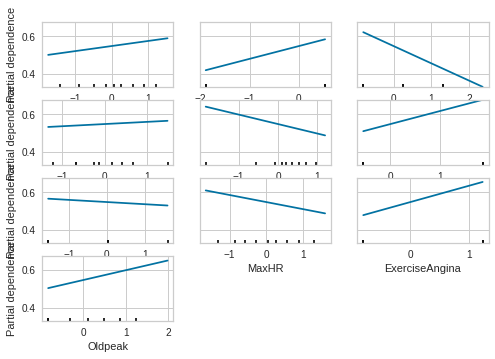

In [46]:
#Using PartialDependenceDisplay
from sklearn.inspection import PartialDependenceDisplay,plot_partial_dependence
my_plots = plot_partial_dependence(classifier1,       
                                   features=[0,1,2,3,4,5,6,7,8,9], # column numbers of plots we want to show
                                   X=X_train,            # raw predictors data.
                                   feature_names=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

The resulting partial dependencies shows that there is no fluctuation among the attributes. The attributes have either linearly increased or decreased

Take one of the models from assignment 2 according to your individual variant (Random
Forest, XGBoost, CatBoost, LightGBM) and output its build-in variable importance built
with “Mean decrease in Impurity” method (use model.feature_importances_).
Compare the results with results of previously considered methods in steps 1-4. Make
conclusions

**Random Forest classifier**

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        36
           1       0.94      0.89      0.92        56

    accuracy                           0.90        92
   macro avg       0.89      0.90      0.90        92
weighted avg       0.91      0.90      0.90        92

Confusion Matrix
 [[33  3]
 [ 6 50]]


-----AUC Plot and ROC Curve-----


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


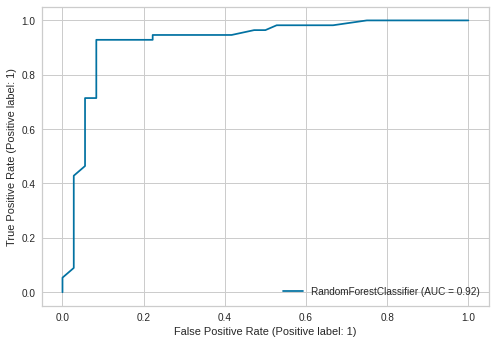

In [29]:
#Write your code for Random forest regression here 
classifier2 = RandomForestClassifier()
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)

print("Random Forest Classifier")
#accuracy, precision, recall, F1 metrics
print(classification_report(y_test, y_pred))

#Confusion Matrix
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred))
print('\n')

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier2,X_test, y_test) 
plt.show()
print('\n')

In [30]:
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
importances = classifier2.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier2.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.020 seconds


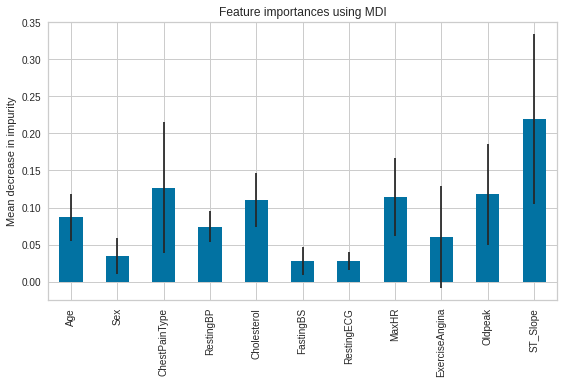

In [31]:
import pandas as pd

forest_importances = pd.Series(importances, index=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Firstly, feature selection based on Mean decrease in Impurity is biased towards preferring variables with more categories. Secondly, when the dataset has two or more correlated features, then any of these correlated features can be used as the predictor. But once one of them is used, the importance of others is significantly reduced since effectively the impurity they can remove is already removed by the first feature. Hence it fails to predict the exact importance.


Here, ST_Slope has more categories and hence it is highly biased

# **`Task 3 “Evaluate the variable importance in your built deep neural network locally for several predictions” `**

1) Use “LIME” method to calculate the variables importance of your build neural networks
locally for several instances of the dataset. Select the instances to predict according to your
individual variant. Present the results as a bar plot. Use
lime.lime_tabular.LimeTabularExplainer in mode=”classification”.

In [32]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 26.8 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=9dfcc4c018b5a78daa84d225384b110c968070d294a686174f3e4b854806234e
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [33]:
import lime
from lime import lime_tabular

#variable importance for the 6th attribute FastingBS
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'],
    class_names=['FastingBS'],
    mode='classification'
)

In [34]:
exp = explainer.explain_instance(
    data_row=X_test[0], 
    predict_fn=model.predict_proba
)

125/125 [==============================] - 0s 2ms/step


In [35]:
#Used show_in_notebook to display a more interactive version
exp.show_in_notebook(show_table=True)

125/125 [==============================] - 0s 2ms/step


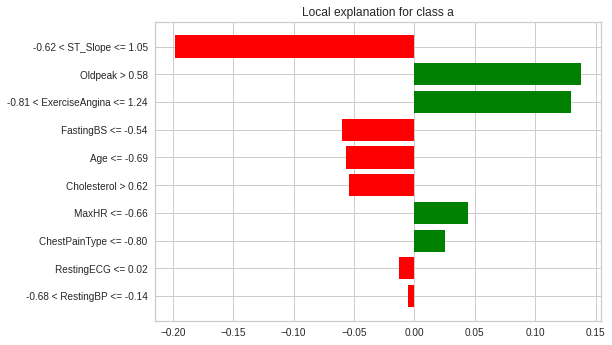

In [36]:
import lime
from lime import lime_tabular

#variable importance for the 6th attribute FastingBS
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'],
    class_names='FastingBS',
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X_test[0], 
    predict_fn=model.predict_proba
)

#Barplot representation

exp.as_pyplot_figure();#Initially it returned 2 bar plots but when a semi-colon was added it returned only one barchart


125/125 [==============================] - 0s 2ms/step


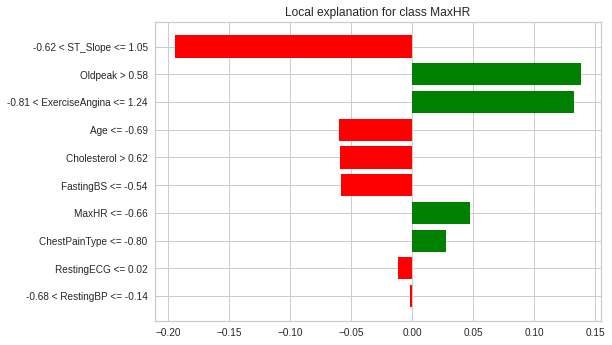

In [37]:
import lime
from lime import lime_tabular

#variable importance for the 8th attribute MaxHR
#mode classification
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'],
    class_names=['Age','MaxHR','Sex'],
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X_test[0], 
    predict_fn=model.predict_proba
)

#Barplot representation

exp.as_pyplot_figure();#Initially it returned 2 bar plots but when a semi-colon was added it returned only one barchart


# **`Task 4 “Evaluate how independent variables influence the target variables construction Partial-Dependence Plots (PDP)”`**

In [54]:
pip install partial_dependence

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


21/21 [==============================] - 0s 2ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


21/21 [==============================] - 0s 2ms/step


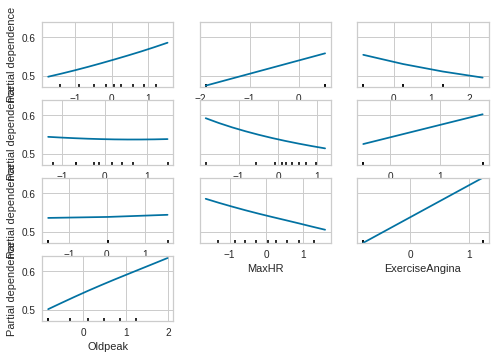

In [41]:
from sklearn.inspection import PartialDependenceDisplay,plot_partial_dependence
my_plots = plot_partial_dependence(model,       
                                   features=[0,1,2,3,4,5,6,7,8,9], # column numbers of plots we want to show
                                   X=X_train,            # raw predictors data.
                                   feature_names=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

Partial dependency with linear increase - 'Age','Sex',FastingBS','ExerciseAngina','Oldpeak'


Partial dependency with linear decrease -'ChestPainType','Cholesterol','MaxHR'

Partial dependency with constant range - 'RestingBP','RestingECG'
